In [2]:
from sklearn.datasets import load_svmlight_files
X_train, y_train, X_test, y_test = load_svmlight_files(("/content/E2006.train", "/content/E2006.test"))

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16087, 150360) (16087,) (3308, 150360) (3308,)


**QUESTION 4 -PART 1 **

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

#lambda_vals = [0, 1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]
lambda_vals=[0.1]

ridge_train_err = []
ridge_test_err = []
ridge_nonzero = []
ridge_l2_norm = []

lasso_train_err = []
lasso_test_err = []
lasso_nonzero = []
lasso_l2_norm = []

for lambda_val in lambda_vals:
    # Ridge regression
    ridge_reg = linear_model.Ridge(alpha=lambda_val, max_iter=1000)
    ridge_reg.fit(X_train, y_train)
    ridge_coefs = ridge_reg.coef_
    ridge_intercept = ridge_reg.intercept_


    
    # Lasso
    if lambda_val>0:
      lasso_reg = linear_model.Lasso(alpha=lambda_val/X_train.shape[0], max_iter=1000)
      lasso_reg.fit(X_train, y_train)
      lasso_coefs = lasso_reg.coef_
      lasso_intercept = lasso_reg.intercept_



In [ ]:
count_ridge_nonzero_coefficients = sum(val != 0.0 for val in ridge_coefs)

print("no of nonzero elements in ridge coefficients: "+str(count_ridge_nonzero_coefficients))

no of nonzero elements in ridge coefficients: 150348


In [ ]:
count_lasso_nonzero_coefficients = sum(val != 0.0 for val in lasso_coefs)
print("no of nonzero elements in lasso coefficients: "+str(count_lasso_nonzero_coefficients))

no of nonzero elements in lasso coefficients: 102


**Question 4- part 1 Discussion**

The cause of the different number of nonzero elements in the coefficient solutions of Ridge regression and Lasso is due to the penalty term used in each method.

Ridge regression uses a penalty term that is proportional to the square of the magnitude of the coefficients, whereas Lasso uses a penalty term that is proportional to the absolute value of the coefficients.

This difference in penalty terms results in Ridge regression tending to shrink the coefficients towards zero, but not necessarily to exactly zero, while Lasso tends to shrink some of the coefficients exactly to zero, resulting in a sparse coefficient solution.

This implication is that Lasso can be useful for feature selection, as it can identify which features are important for predicting the outcome, and which are not. In contrast, Ridge regression may include all features in the model to some degree, even if they are not relevant for predicting the outcome.


**QUESTION 4 -PART 2 **

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
lambda_vals_list = [0, 1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]
#lambda_vals=[0.1]

ridge_train_err = []
ridge_test_err = []
ridge_nonzero = []
ridge_l2_norm = []

lasso_train_err = []
lasso_test_err = []
lasso_nonzero = []
lasso_l2_norm = []

for lambda_val in lambda_vals_list:
    print("executing for lambda="+str(lambda_val))
    # Ridge regression
    ridge_reg = linear_model.Ridge(alpha=lambda_val, max_iter=1000)
    ridge_reg.fit(X_train, y_train)
    ridge_coefs = ridge_reg.coef_
    ridge_intercept = ridge_reg.intercept_

    ridge_y_Pred=ridge_reg.predict(X_train)
    ridge_rmse = np.sqrt(mean_squared_error(y_train, ridge_y_Pred))
    print("Ridge Train with lambda="+str(lambda_val)+" RMSE:"+str(ridge_rmse))
    ridge_train_err.append(ridge_rmse)
    

    ridge_ytest_Pred=ridge_reg.predict(X_test)
    ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_ytest_Pred))
    print("Ridge Test with lambda="+str(lambda_val)+" RMSE:"+str(ridge_test_rmse))
    ridge_test_err.append(ridge_test_rmse)
    
    count_ridge_nonzero_coefficients = sum(val != 0.0 for val in ridge_coefs)
    ridge_nonzero.append(count_ridge_nonzero_coefficients)
    
    ridge_l2_norm.append(np.linalg.norm(ridge_coefs, ord=2))
    
    
    #ridge_train_pred = np.dot(X_train, ridge_coefs) + ridge_intercept
    #ridge_test_pred = np.dot(X_test, ridge_coefs) + ridge_intercept
    #
    #ridge_train_err.append(np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
    #ridge_test_err.append(np.sqrt(mean_squared_error(y_test, ridge_test_pred)))
    #ridge_nonzero.append(len(ridge_coefs[ridge_coefs != 0]))
    #ridge_l2_norm.append(np.linalg.norm(ridge_coefs, ord=2))
    
    # Lasso
    if lambda_val==0:
      lasso_train_err.append(0.0)
      lasso_test_err.append(0.0)
      lasso_nonzero.append(0)
      lasso_l2_norm.append(0)
    elif lambda_val>0:
      lasso_reg = linear_model.Lasso(alpha=lambda_val/X_train.shape[0], max_iter=800)
      lasso_reg.fit(X_train, y_train)
      lasso_coefs = lasso_reg.coef_
      lasso_intercept = lasso_reg.intercept_

      lasso_y_Pred=lasso_reg.predict(X_train)
      lasso_rmse = np.sqrt(mean_squared_error(y_train, lasso_y_Pred))
      print("Lasso Train with lambda="+str(lambda_val)+" RMSE:"+str(lasso_rmse))
      lasso_train_err.append(lasso_rmse)

      lasso_ytest_Pred=lasso_reg.predict(X_test)
      lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_ytest_Pred))
      print("Lasso Test with lambda="+str(lambda_val)+" RMSE:"+str(lasso_test_rmse))
      lasso_test_err.append(lasso_test_rmse)
        
      count_lasso_nonzero_coefficients = sum(val != 0.0 for val in lasso_coefs)
      lasso_nonzero.append(count_lasso_nonzero_coefficients)
        
      lasso_l2_norm.append(np.linalg.norm(lasso_coefs, ord=2))
#
    #  lasso_train_pred = np.dot(X_train, lasso_coefs) + lasso_intercept
    #  lasso_test_pred = np.dot(X_test, lasso_coefs) + lasso_intercept
#
    #  lasso_train_err.append(np.sqrt(mean_squared_error(y_train, lasso_train_pred)))
    #  lasso_test_err


executing for lambda=0
Ridge Train with lambda=0 RMSE:0.34338120553994
Ridge Test with lambda=0 RMSE:0.36931654896570226
executing for lambda=1e-05
Ridge Train with lambda=1e-05 RMSE:0.34334338202369247
Ridge Test with lambda=1e-05 RMSE:0.3693158901938875


/sw/eb/sw/Anaconda3/5.3.0/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Train with lambda=1e-05 RMSE:0.0029901096379031755
Lasso Test with lambda=1e-05 RMSE:0.56112048343611
executing for lambda=0.001
Ridge Train with lambda=0.001 RMSE:0.3439615328303954
Ridge Test with lambda=0.001 RMSE:0.36935895669145474
Lasso Train with lambda=0.001 RMSE:0.10843356504975925
Lasso Test with lambda=0.001 RMSE:0.45207023321178635
executing for lambda=0.01
Ridge Train with lambda=0.01 RMSE:0.3483144918809177
Ridge Test with lambda=0.01 RMSE:0.36974003441073283
Lasso Train with lambda=0.01 RMSE:0.27121476304038067
Lasso Test with lambda=0.01 RMSE:0.37152207354607364
executing for lambda=0.1
Ridge Train with lambda=0.1 RMSE:0.3621209683924796
Ridge Test with lambda=0.1 RMSE:0.3716956294803696
Lasso Train with lambda=0.1 RMSE:0.3614539385024552
Lasso Test with lambda=0.1 RMSE:0.36866048420636616
executing for lambda=1
Ridge Train with lambda=1 RMSE:0.3703467258839155
Ridge Test with lambda=1 RMSE:0.3738372661827589
Lasso Train with lambda=1 RMSE:0.3720207570717243
Lasso

In [ ]:
print("Ridge- RMSE for training data:")
print(ridge_train_err)
print('-----------------------------------------------------------------')

print("Ridge- RMSE for test data:")
print(ridge_test_err)
print('-----------------------------------------------------------------')

print("Lasso- RMSE for training data:")
print(lasso_train_err)
print('-----------------------------------------------------------------')

print("Lasso- RMSE for test data:")
print(lasso_test_err)
print('-----------------------------------------------------------------')

Ridge- RMSE for training data:
[0.34338120553994, 0.34334338202369247, 0.3439615328303954, 0.3483144918809177, 0.3621209683924796, 0.3703467258839155, 0.3718355413419254, 0.3721453937846206, 0.38013024959623193, 0.49511800150792296, 0.6103827444644189, 0.6299571156570283]
-----------------------------------------------------------------
Ridge- RMSE for test data:
[0.36931654896570226, 0.3693158901938875, 0.36935895669145474, 0.36974003441073283, 0.3716956294803696, 0.3738372661827589, 0.37437113277351874, 0.3740693824653222, 0.3781281845967574, 0.48378204791611007, 0.5966515870489479, 0.6163326745606765]
-----------------------------------------------------------------
Lasso- RMSE for training data:
[0.0, 0.0029901096379031755, 0.10843356504975925, 0.27121476304038067, 0.3614539385024552, 0.3720207570717243, 0.3720222216988522, 0.3721686553040908, 0.386531969313509, 0.6322783539114604, 0.6322783539114604, 0.6322783539114604]
-------------------------------------------------------------

In [ ]:
import pickle

with open('ridge_train_err.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ridge_train_err, file)

In [ ]:
with open('ridge_test_err.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ridge_test_err, file)
    
with open('ridge_nonzero.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ridge_nonzero, file)
    
with open('ridge_l2_norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ridge_l2_norm, file)
    
    
with open('lasso_train_err.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(lasso_train_err, file)
    
with open('lasso_test_err.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(lasso_test_err, file)
    
with open('lasso_nonzero.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(lasso_nonzero, file)
    
with open('lasso_l2_norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(lasso_l2_norm, file)

In [3]:
import pickle
with open('ridge_train_err.pkl', 'rb') as f:
   ridge_train_err = pickle.load(f)

with open('ridge_test_err.pkl', 'rb') as f:
   ridge_test_err = pickle.load(f)

with open('ridge_nonzero.pkl', 'rb') as f:
   ridge_nonzero = pickle.load(f)

with open('ridge_l2_norm.pkl', 'rb') as f:
   ridge_l2_norm = pickle.load(f)

with open('lasso_train_err.pkl', 'rb') as f:
   lasso_train_err = pickle.load(f)

with open('lasso_test_err.pkl', 'rb') as f:
   lasso_test_err = pickle.load(f)

with open('lasso_nonzero.pkl', 'rb') as f:
   lasso_nonzero = pickle.load(f)

with open('lasso_l2_norm.pkl', 'rb') as f:
   lasso_l2_norm = pickle.load(f)

In [7]:
import matplotlib.pyplot as plt

In [4]:
lambda_vals_list = [0, 1e-5, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]

Ridge Plot- RMSE(train data) vs Lambda


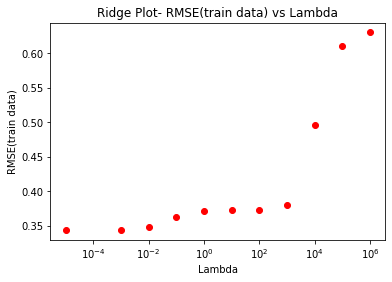

In [9]:
print("Ridge Plot- RMSE(train data) vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list, ridge_train_err, 'ro')
plt.ylabel("RMSE(train data)")
plt.xlabel("Lambda")
plt.title("Ridge Plot- RMSE(train data) vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

We can see that the least value of RMSE for Ridge Train error is 0.34334338202369247 at Lambda=1e-05

Ridge Plot- RMSE(test data) vs Lambda


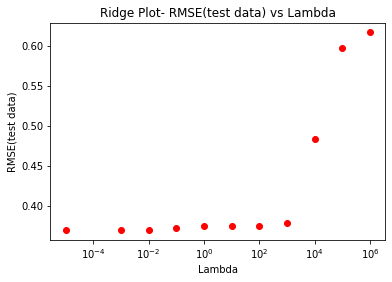

In [11]:
print("Ridge Plot- RMSE(test data) vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot( lambda_vals_list,ridge_test_err, 'ro')
plt.ylabel("RMSE(test data)")
plt.xlabel("Lambda")
plt.title("Ridge Plot- RMSE(test data) vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()

plt.show()

We can see that the least value of RMSE for Ridge Test error is 0.3693158901938875 at Lambda=1e-05

Lasso Plot- RMSE(train data) vs Lambda


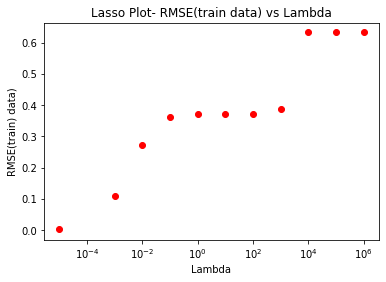

In [18]:
print("Lasso Plot- RMSE(train data) vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list,lasso_train_err,  'ro')
plt.ylabel("RMSE(train) data)")
plt.xlabel("Lambda")
plt.title("Lasso Plot- RMSE(train data) vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

We can see that the least value of RMSE for Lasso Train error is 0.0029901096379031755 at Lambda=1e-05

Lasso Plot- RMSE(test data) vs Lambda


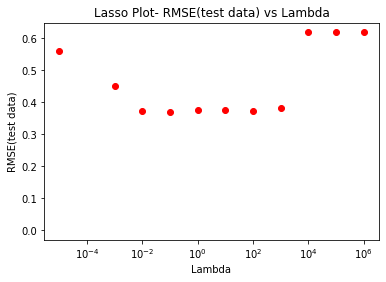

In [19]:
print("Lasso Plot- RMSE(test data) vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list,lasso_test_err,  'ro')
plt.ylabel("RMSE(test data)")
plt.xlabel("Lambda")
plt.title("Lasso Plot- RMSE(test data) vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

We can see that the least value of RMSE for Lasso Test error is 0.36866048420636616 at Lambda=0.1

**Overall Comparison for Lowest Error(RMSE) with the best value of Lambda**

We can see that the least value of RMSE for Ridge Train error is 0.34334338202369247 at Lambda=1e-05


---


We can see that the least value of RMSE for Ridge Test error is 0.3693158901938875 at Lambda=1e-05


---


We can see that the least value of RMSE for Lasso Train error is 0.0029901096379031755 at Lambda=1e-05


---


We can see that the least value of RMSE for Lasso Test error is 0.36866048420636616 at Lambda=0.1

**Overall Discussion on RMSE(error curve) vs lambda for Ridge and Lasso**

We can see, as the value of Lambda increases, the RMSE values for both methods also increase. However, Ridge regression seems to have a smoother increase in RMSE values as Lambda increases, while Lasso regression has a more abrupt increase. This suggests that Ridge regression may be more robust to overfitting, while Lasso regression may be more prone to overfitting.

ridge non zero array:
[150348, 150348, 150348, 150348, 150348, 150348, 150348, 150348, 150348, 150348, 150234, 150345]
----------------------------------------------------------------------
Ridge Plot- Non-zero solution in w vs Lambda


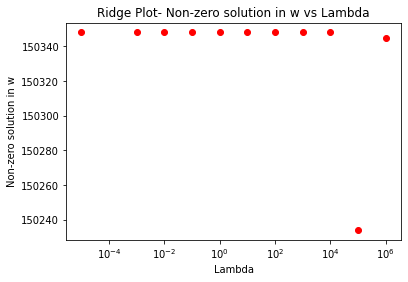

In [20]:
print("ridge non zero array:")
print(ridge_nonzero)
print("----------------------------------------------------------------------")

print("Ridge Plot- Non-zero solution in w vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list,ridge_nonzero,  'ro')
plt.ylabel("Non-zero solution in w")
plt.xlabel("Lambda")
plt.title("Ridge Plot- Non-zero solution in w vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

lasso non zero array:
[0, 27379, 11259, 3060, 102, 1, 1, 1, 1, 0, 0, 0]
----------------------------------------------------------------------
Lasso Plot- Non-zero solution in w vs Lambda


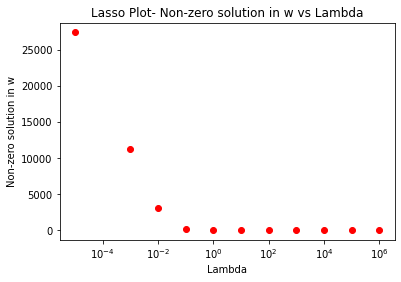

In [21]:
print("lasso non zero array:")
print(lasso_nonzero)
print("----------------------------------------------------------------------")

print("Lasso Plot- Non-zero solution in w vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot( lambda_vals_list,lasso_nonzero, 'ro')
plt.ylabel("Non-zero solution in w")
plt.xlabel("Lambda")
plt.title("Lasso Plot- Non-zero solution in w vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

**Discussion on number of non-zero weights vs lambda for lasso and ridge**

As we can see, as lambda increases, the number of non-zero terms decreases for both Lasso and Ridge regression (even though Ridge shows more stable and little dicreases at points). However, Lasso regression is more likely to set coefficients exactly to zero, resulting in a larger drop in the number of non-zero terms for Lasso regression compared to Ridge regression.

Overall, this plot can be helpful in understanding the trade-off between model complexity and regularization strength for both Lasso and Ridge regression. A higher value of λ will result in a simpler model with fewer non-zero terms, but may also lead to higher bias (i.e., underfitting). Conversely, a lower value of λ will result in a more complex model with more non-zero terms, but may also lead to higher variance (i.e., overfitting).

ridge l2 norm:
[69.96172595214044, 70.07125168297782, 68.2410751497113, 55.73481341341398, 20.541889726697935, 3.2170244253720237, 0.9234693428038793, 0.846075953054323, 0.73104911960801, 0.3114545756180977, 0.04614647838442532, 0.004849921089159851]
----------------------------------------------------------------------
Ridge Plot-L2 Norm of w vs Lambda


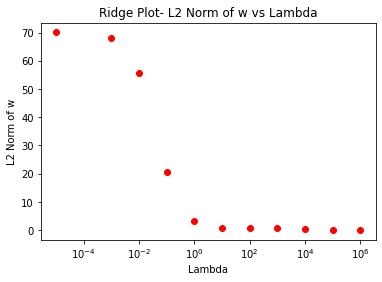

In [22]:
print("ridge l2 norm:")
print(ridge_l2_norm)
print("----------------------------------------------------------------------")

print("Ridge Plot-L2 Norm of w vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list,ridge_l2_norm,  'ro')
plt.ylabel("L2 Norm of w")
plt.xlabel("Lambda")
plt.title("Ridge Plot- L2 Norm of w vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

lasso l2 norm:
[0, 7681.285067717054, 3692.2695793848065, 778.5489101524644, 76.6796635074215, 0.8627086158709848, 0.8611149125657082, 0.8451778795129439, 0.6858075489852984, 0.0, 0.0, 0.0]
----------------------------------------------------------------------
lasso Plot-L2 Norm of w vs Lambda


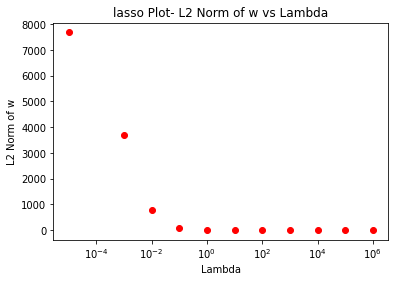

In [23]:
print("lasso l2 norm:")
print(lasso_l2_norm)
print("----------------------------------------------------------------------")

print("lasso Plot-L2 Norm of w vs Lambda")
#plt.plot(ridge_train_err, lambda_vals_list, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(lambda_vals_list,lasso_l2_norm,  'ro')
plt.ylabel("L2 Norm of w")
plt.xlabel("Lambda")
plt.title("lasso Plot- L2 Norm of w vs Lambda")
#plt.xscale("log")
plt.xscale("log")
#plt.legend()
plt.show()

**Discussion on L2 norm of w vs lambda for Lasso and ridge**

As we can see, as the value of lambda increases, the L2 norm of the weight vector decreases for both Lasso and Ridge regression. However, Lasso regression tends to drive the weight vector to exactly zero, resulting in a sharper decrease in the L2 norm compared to Ridge regression.

Overall, this plot can be helpful in understanding how the regularization parameter affects the magnitude of the weight vector for both Lasso and Ridge regression. A higher value of lambda will result in a simpler model with smaller weight vectors, but may also lead to higher bias (i.e., underfitting). Conversely, a lower value of lambda will result in a more complex model with larger weight vectors, but may also lead to higher variance (i.e., overfitting).

**QUESTION 4 -PART 3 **

In [16]:
#question 4- part 3

from sklearn.linear_model import RidgeCV

Ridge_regressor = RidgeCV(alphas=lambda_vals_list, cv=5)#.fit(X_train, y_train)
Ridge_regressor.fit(X_train, y_train)
#cv_mse = np.mean(regressor.cv_values_, axis=0)

# Best alpha
print(Ridge_regressor.alpha_)

0.01


In [18]:
Ridge_regressor_best_model = RidgeCV(alphas= [Ridge_regressor.alpha_], cv = 5).fit(X_train, y_train)
y_test_predicted_Ridgecv = Ridge_regressor_best_model.predict(X_test)
RMSE_Ridge_regressor_best_model = np.sqrt(mean_squared_error(y_test, y_test_predicted_Ridgecv))
print("Best lambda = {} and RMSE for test data on Ridge is {}".format(Ridge_regressor.alpha_, RMSE_Ridge_regressor_best_model))

Best lambda = 0.01 and RMSE for test data on Ridge is 0.368049852469026


In [5]:
from sklearn.linear_model import LassoCV

newLambdaList = [i / X_train.shape[0] for i in lambda_vals_list]
Lasso_regressor = LassoCV(alphas=newLambdaList[1:], max_iter=100, cv=5)#.fit(X_train, y_train)
Lasso_regressor.fit(X_train, y_train)
#cv_mse = np.mean(regressor.cv_values_, axis=0)

# Best alpha
print(Lasso_regressor.alpha_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.2496643706709, tolerance: 0.5195343159707846
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.3485781786198, tolerance: 0.5195343159707846
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.634016264381906, tolerance: 0.5195343159707846
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Convergen

6.216199415677255e-06


In [13]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [14]:
Lasso_regressor_best_model = LassoCV(alphas= [Lasso_regressor.alpha_], cv = 5, max_iter=100).fit(X_train, y_train)
y_test_predicted_Lassocv = Lasso_regressor_best_model.predict(X_test)
RMSE_Lasso_regressor_best_model = np.sqrt(mean_squared_error(y_test, y_test_predicted_Lassocv))
print("Best lambda = {} and RMSE for test data on Lasso is {}".format(Lasso_regressor.alpha_, RMSE_Lasso_regressor_best_model))

Best lambda = 6.216199415677255e-06 and RMSE for test data on Lasso is 0.36866048420636616
